 student: Daniela Alejandra Gonzalez


For this problem, I followed this steps:
1.  Loading the Kosarak.dat file into Google colab environment
2.  Parsing the file to obtain the transactions
3. Retrieving the identity of the articles clicked
4. Sorting and mapping of those indexes
5. Generation of the sparse ARFF file with its header and consequent loading of the data from the transactions from parsed_data

I also encountered an issue around line 41280 with the order of the indexes, so I had to re-check and ensure they were properly sorted.




In [ ]:
# 1) Retrieving and parsing the Kosarak file
with open('kosarak.dat', 'r', encoding='utf-8') as file:
  parsed_data = [line.split() for line in file]

In [ ]:
# 2) Getting the identity of the cliked articles (clicked_items_id) and sorting and mapping them to indexes
clicked_items_id = set()
for transactions in parsed_data:
  clicked_items_id.update(transactions)

sorted_items = sorted(map(int, clicked_items_id)) #sorting
item_index = {item: i for i, item in enumerate(sorted_items)} #mapping

In [ ]:
# 3)Generation of the ARFF header
header = "@RELATION kosarak\n\n"
for item in sorted_items:
    header += f"@ATTRIBUTE item{item} {{0,1}}\n"
header += "\n@DATA\n"

In [ ]:
# 4) Writing the sparse ARFF mode
with open('kosarak_sparse.arff', 'w', encoding='utf-8') as output:
    output.write(header)

    for i, transaction in enumerate(parsed_data):
        transaction_set = set(map(int, transaction))
        sparse_row = [(item_index[item], "1") for item in transaction_set if item in item_index]
        sparse_row.sort(key=lambda x: x[0])  #Ensuring the ascent order


        sparse_row_text = [f"{index} {value}" for index, value in sparse_row] #tEXT format required for Weka

        # Defensive code to ensure everything have the right asscedent order related to the indexes
        if not all(int(sparse_row_text[i].split()[0]) <= int(sparse_row_text[i+1].split()[0]) for i in range(len(sparse_row_text)-1)):
            print(f"Error in this transaction in the order {idx + 1}: {sparse_row_text}")
            break

        if sparse_row_text:
            output.write("{" + ", ".join(sparse_row_text) + "}\n")




**Weka**

**Use Weka’s FP-Growth implementation to find rules that have support count of at least 49, 500 and
confidence of at least 99% – record your rules (there should be 2).**

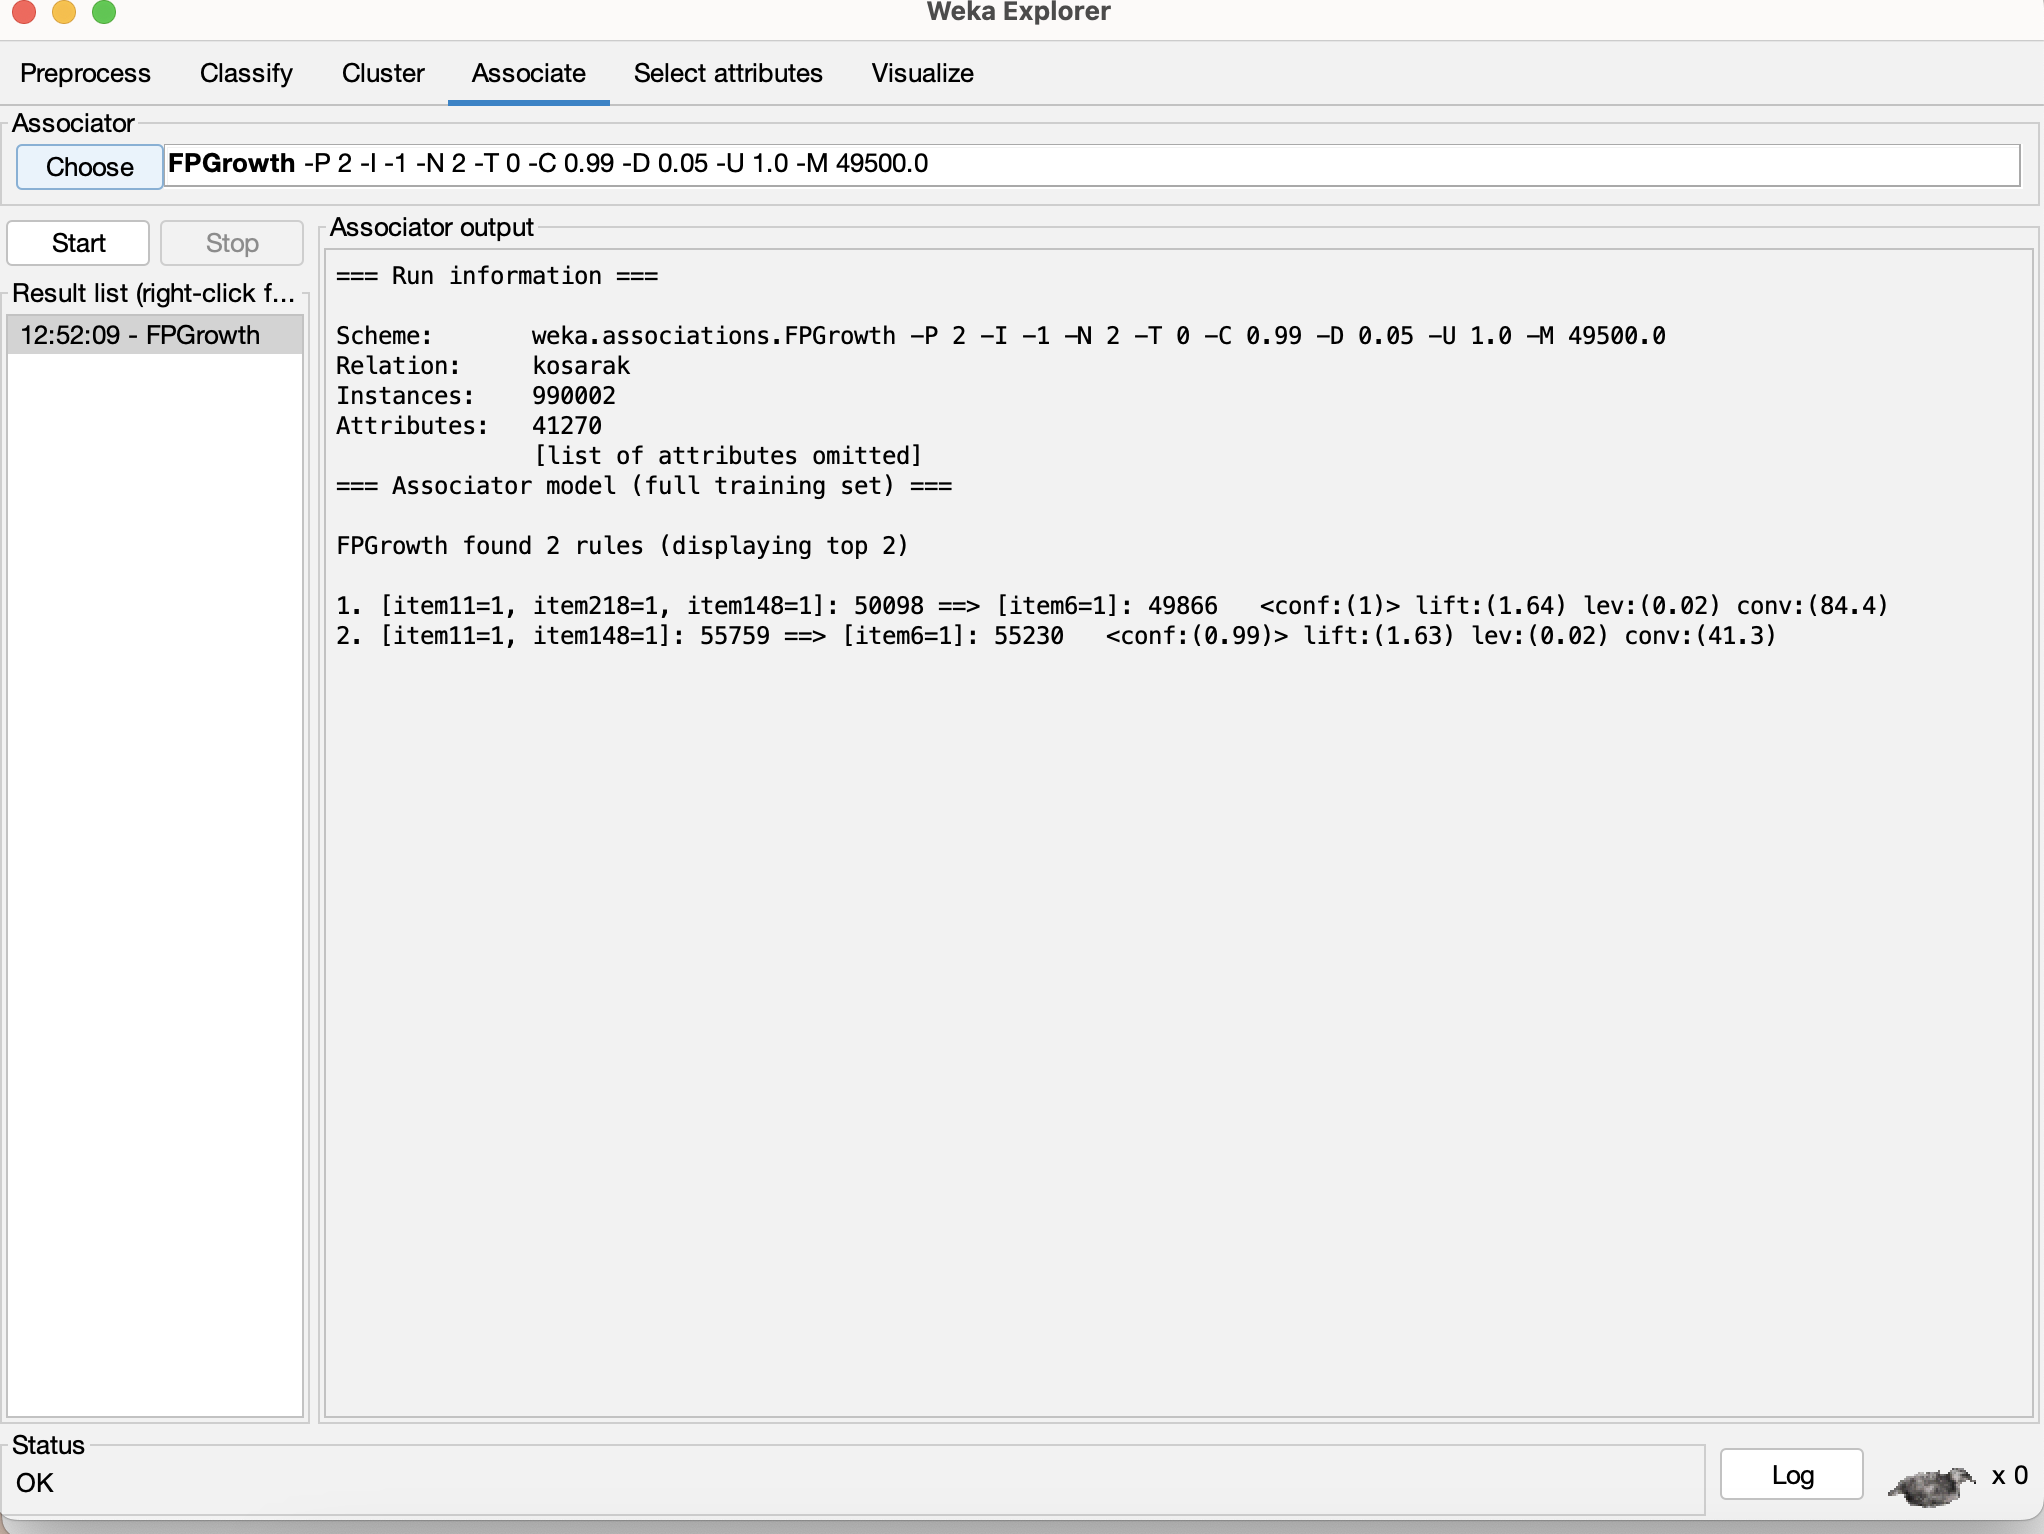

**Run the algorithm at least 5 times. Then look to the log and record how much time each took. How does
the average time compare to the time necessary to convert the dataset and then load into Weka?**

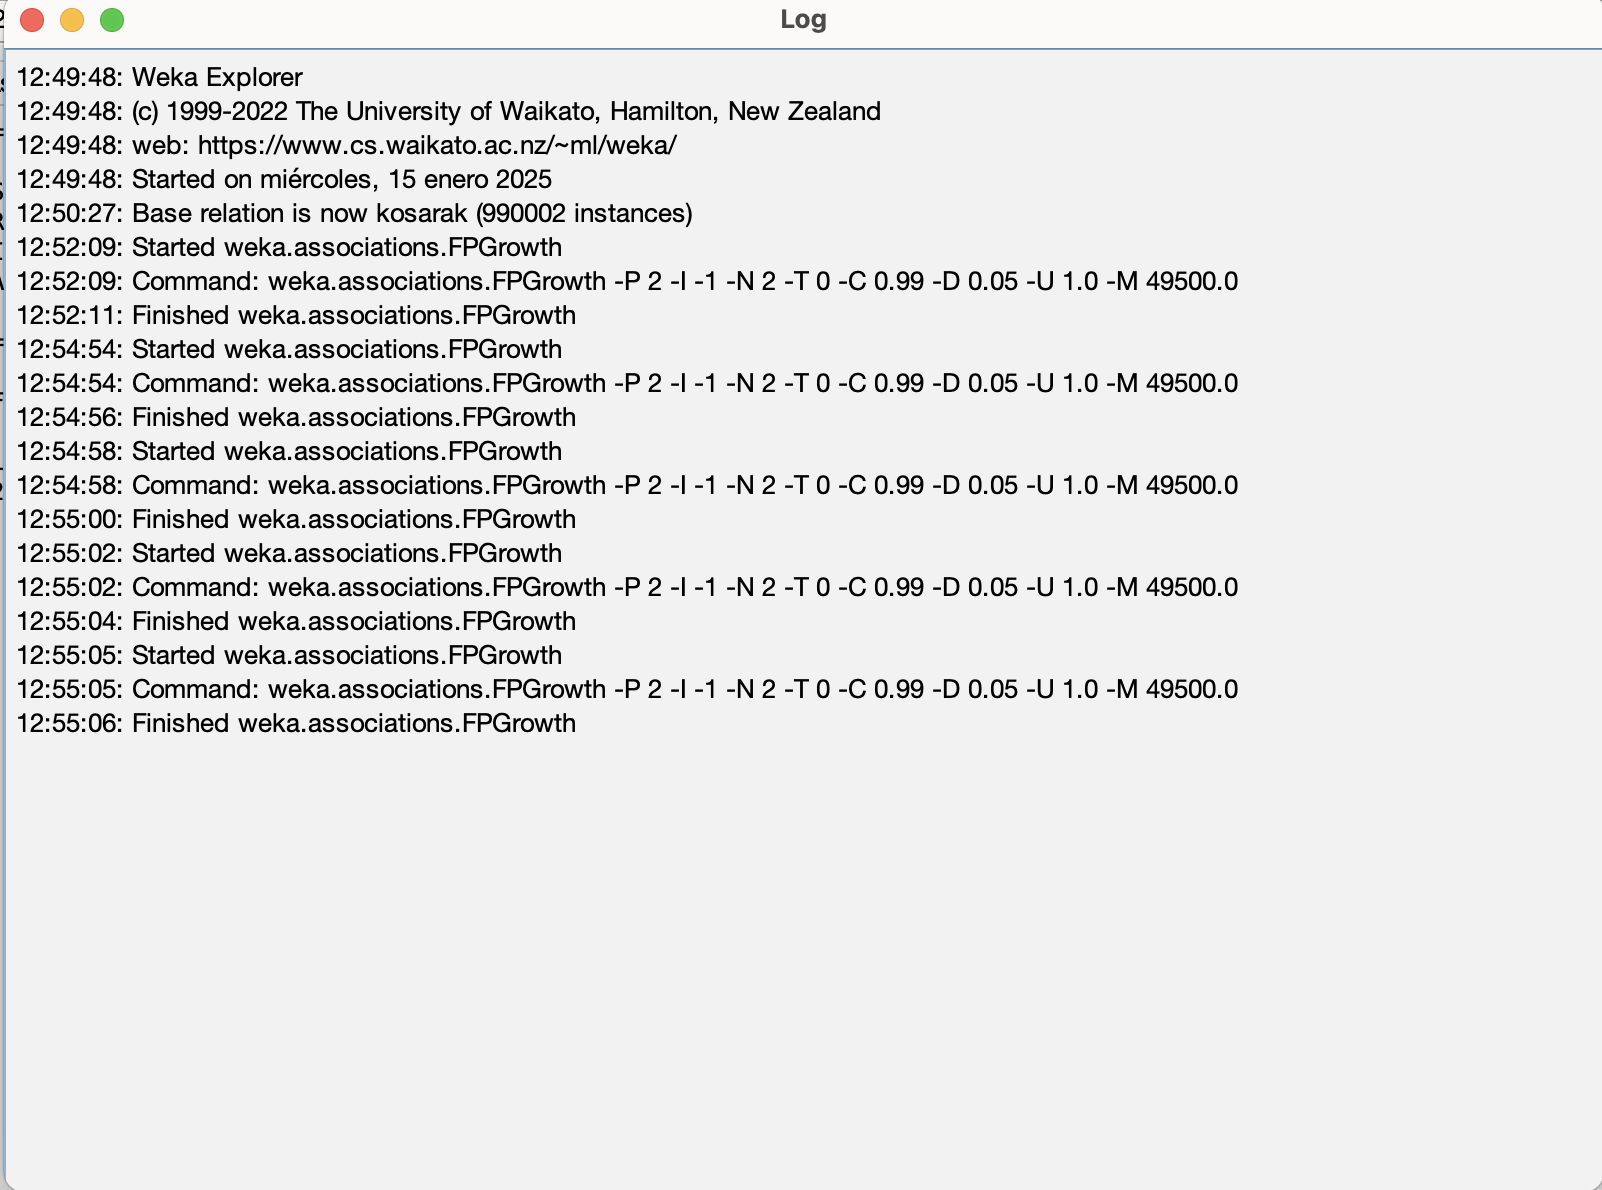